In [1]:
#import statements for all of the packages that I plan to use.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline


<a id='about'></a>
## About the Data

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
- There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

Which genres are most popular from year to year? What kinds of properties are associated with movies that have high revenues?







## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.


### General Properties

- How average votes changes?
- What attributes have a high correlation?
- What movie have the highest or lowest profit?
- What movie have the longest and shortest runtime?


In [2]:
tmdb_df = pd.read_csv('tmdb-movies.csv')
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


_info_ function output informations like number of rows and columns, names of each column, dataypes. we need to change the datatype for *release_date* from string to date. we need to change the *budget_adj* and *revenue_adj* from float to int.

In [3]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# This is the size of the dataset
tmdb_df.shape

(10866, 21)

In [5]:
# checking the number of duplicated rows
tmdb_df.duplicated().sum()

1

### columns with missing values

There are few number of nulls in: *imdb_id, cast, director, overview* and *genres*. where there are large number of nulls in: *homepage, tagline, keywords* and *production_companies*. I will drop some variables in the data cleaning process since I am not going to use them in my analysis.

In [6]:
tmdb_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# checking the number of unique values in each column
tmdb_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Summary statistics for the dataset

There is at least 50% of 0's in budget and revenue columns (same to budget_adj and revenue_adj). Also, there is a min runtime of 0 which lead to there are 0's in the runtime column

In [8]:
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Investigating the number of 0's

As expected the number of 0's in *budget* and *budget_adj* is the same. the same goes to *revenue* and *revenue_adj*.

For the zero values in the *runtime*, I will replace them the mean value.
For budget and revenue, in order not to lose more than 50% of the dataset I will replace them with the mean values by Genres in the data cleaing process.

In [9]:
runtime_0 = (tmdb_df['runtime'] == 0).sum()
print('Number of 0s in runtime is {}'.format(runtime_0))

budget_0 = (tmdb_df['budget'] == 0).sum()
print('Number of 0s in budget is {}'.format(budget_0))
budget_adj = (tmdb_df['budget_adj'] == 0).sum()
print('Number of 0s in budget_adj is {}'.format(budget_adj))

revenue_0 = (tmdb_df['revenue'] == 0).sum()
print('Number of 0s in revenue is {}'.format(revenue_0))
revenue_adj = (tmdb_df['revenue_adj'] == 0).sum()
print('Number of 0s in revenue_adj is {}'.format(revenue_adj))

Number of 0s in runtime is 31
Number of 0s in budget is 5696
Number of 0s in budget_adj is 5696
Number of 0s in revenue is 6016
Number of 0s in revenue_adj is 6016


## Data Cleaning 

As seen from above, the following will be done for data cleaning
- Drop columns and remove duplicates 
- convert datatype for _relaease_date_
- replace zeros with nulls
- replace zeros in runtime, budget and revenue with means
- add a profit column
- spliting Genres column

### remove duplicates


In [10]:
# this is to remove duplicates
tmdb_df.drop_duplicates(inplace=True)

# check for change
tmdb_df.duplicated().sum()

0

### convert *release_date* to date datatype

I will convert it to this formate YYYY-MM-DD

In [11]:
# this is for converting *release_date* to date datatype 
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

# check for change
tmdb_df.dtypes


id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [12]:
tmdb_df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


### replace zeros with nulls

I will replace the zeros in *runtime*, *budget* and *revenue* so that I could replace them with the means  

In [13]:
# List of variables that I will replace the zeros with nulls
list_null = ['runtime', 'budget_adj', 'revenue_adj']

# this is to replace the zeros with nulls
tmdb_df[list_null] = tmdb_df[list_null].replace(0, np.NAN)

# check for change
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10834.000000,10865.000000,10865.000000,10865.000000,5.169000e+03,4.849000e+03
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.363855,217.399632,5.975012,2001.321859,3.688907e+07,1.151009e+08
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,30.948225,575.644627,0.935138,12.813260,4.196096e+07,1.988557e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046585e+07
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,2.271505e+07,4.395666e+07
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,112.000000,146.000000,6.600000,2011.000000,5.008384e+07,1.316482e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### replacing nulls with the means

since there is a few nulls in runtime, I will replace the null with the total mean.
but the budget and the revenue, I will replace them with the mean by genres 
in order to do this I need first to split the genres columns and I will only condider the first genre
and then based on the averages for each genre I will replace nulls for the corrsponding average for that genre


In [14]:
# thsi is to split the genre into two columns, and I will only consider the first one

tmdb_df['genres1'], tmdb_df['genres2'] = tmdb_df['genres'].str.split('|', 1).str

# check for change
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres1,genres2
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure|Science Fiction|Thriller
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure|Science Fiction|Thriller
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction|Thriller
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure|Science Fiction|Fantasy
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime|Thriller


In [15]:
# this is to replace nulls in runtime with mean
tmdb_df['runtime'].fillna((tmdb_df['runtime'].mean()), inplace=True)

# this is to replace null in budget with the mean corrsponding to the genre
tmdb_df['budget_adj'] = tmdb_df['budget_adj'].fillna(tmdb_df.groupby('genres1')['budget_adj'].transform('mean'))
tmdb_df['revenue_adj'] = tmdb_df['revenue_adj'].fillna(tmdb_df.groupby('genres1')['revenue_adj'].transform('mean'))
tmdb_df.isnull().sum()





id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                31
revenue_adj               32
genres1                   23
genres2                 2351
dtype: int64

there is still around 30s for each budget and revenue, these will be replaced with the total mean

In [16]:
tmdb_df['budget_adj'].fillna((tmdb_df['budget_adj'].mean()), inplace=True)
tmdb_df['revenue_adj'].fillna((tmdb_df['revenue_adj'].mean()), inplace=True)

tmdb_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
genres1                   23
genres2                 2351
dtype: int64

In [17]:
# instead of making a new columns, I will adjust the budget and revenue columns to be the budgets_adj and revenue_dj but in millions 


tmdb_df['budget'] = tmdb_df['budget_adj'] /1000000
tmdb_df['revenue'] = tmdb_df['revenue_adj'] /1000000
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres1,genres2
0,135397,tt0369610,32.985763,137.999939,1392.445893,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure|Science Fiction|Thriller
1,76341,tt1392190,28.419936,137.999939,348.161292,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure|Science Fiction|Thriller
2,262500,tt2908446,13.112507,101.199955,271.619025,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction|Thriller
3,140607,tt2488496,11.173104,183.999919,1902.723130,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure|Science Fiction|Fantasy
4,168259,tt2820852,9.335014,174.799923,1385.748801,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime|Thriller


### Droping columns 

The columns that I will not be using will be droped from the dataset

In [18]:

# this is to drop the columns
tmdb_df.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'overview', 'genres','genres2','budget_adj','revenue_adj'], axis=1, inplace=True)

# now I will create a new column for profit 
tmdb_df['profit'] = tmdb_df['revenue'] - tmdb_df['budget']

# check for change
tmdb_df.head()

,popularity,budget,revenue,original_title,director,keywords,runtime,production_companies,release_date,vote_count,vote_average,release_year,genres1,profit
0,32.985763,137.999939,1392.445893,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Action,1254.445953
1,28.419936,137.999939,348.161292,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,Action,210.161353
2,13.112507,101.199955,271.619025,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,Adventure,170.419070
3,11.173104,183.999919,1902.723130,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,Action,1718.723211
4,9.335014,174.799923,1385.748801,Furious 7,James Wan,car race|speed|revenge|suspense|car,137.0,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,Action,1210.948878


In [19]:
tmdb_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,10865.000000,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,3.488168e+01,110.353873,102.363855,217.399632,5.975012,2001.321859,75.472190
std,1.000231,3.163606e+01,140.861515,30.904039,575.644627,0.935138,12.813260,125.259385
min,0.000065,9.210911e-07,0.000002,2.000000,10.000000,1.500000,1960.000000,-413.912431
25%,0.207575,1.432631e+01,42.053236,90.000000,17.000000,5.400000,1995.000000,12.309796
50%,0.383831,2.784724e+01,76.411534,99.000000,38.000000,6.000000,2006.000000,53.959205
75%,0.713857,5.060938e+01,142.637579,111.000000,146.000000,6.600000,2011.000000,92.028201
max,32.985763,4.250000e+02,2827.123750,900.000000,9767.000000,9.200000,2015.000000,2750.136651


In [20]:
# adding column for movies that are based on novles or not based on a novel
# to check whether the data is based on a novel or not, we will use the coulmn keywords and search for the sentence 
#'based on novel'



tmdb_df['based_on_novel'] = np.where(tmdb_df['keywords'].str.contains('based on novel', regex=True),
                        'based on novel', 'not based on novel')
tmdb_df.head()



,popularity,budget,revenue,original_title,director,keywords,runtime,production_companies,release_date,vote_count,vote_average,release_year,genres1,profit,based_on_novel
0,32.985763,137.999939,1392.445893,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Action,1254.445953,not based on novel
1,28.419936,137.999939,348.161292,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,Action,210.161353,not based on novel
2,13.112507,101.199955,271.619025,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,Adventure,170.419070,based on novel
3,11.173104,183.999919,1902.723130,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,Action,1718.723211,not based on novel
4,9.335014,174.799923,1385.748801,Furious 7,James Wan,car race|speed|revenge|suspense|car,137.0,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,Action,1210.948878,not based on novel


## Exploratory Data Analysis

By now the data is cleaned and ready to be analyzed 

I will filter the data for the following genres, since they are the most commonly used

In [21]:
#Thia function is to give the average of a column
def average_col(col):
    
    return tmdb_df[col].mean()

In [22]:
average_col('vote_average')

5.975011504832047

the average votes for all movies in this dataset is 5.975. to have a better look and understanding of the votes for all the movies we will plot it 


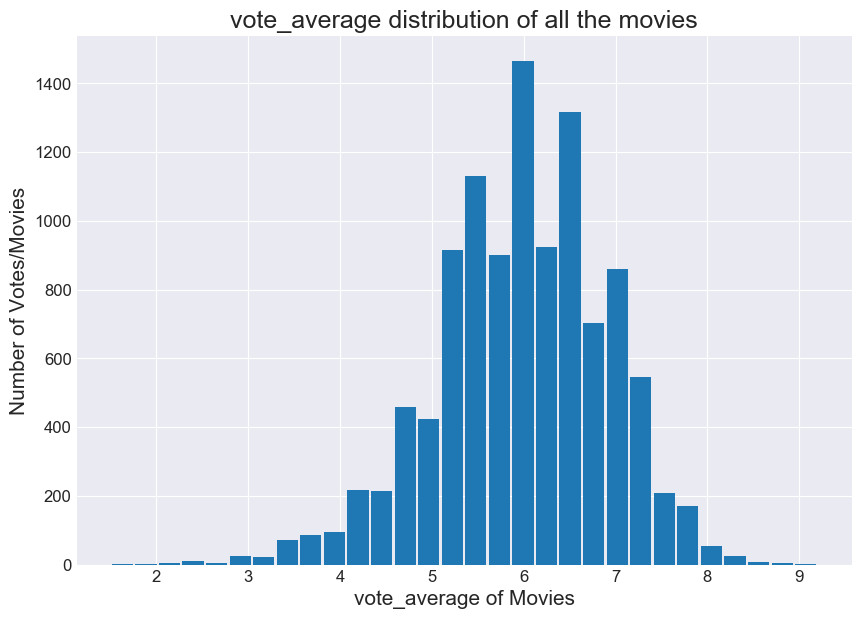

In [23]:
#this is for plot histogram of vote_average of movies

#gives styles to bg plot
sns.set_style('darkgrid')

#chaging the label size, this will change the size of all plots that we plot from now!
plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 12)

#giving the figure size(width, height)
plt.figure(figsize=(10,7), dpi = 100)
#x-axis label name
plt.xlabel('vote_average of Movies', fontsize = 15)
#y-axis label name
plt.ylabel('Number of Votes/Movies', fontsize=15)
#title of the graph
plt.title('vote_average distribution of all the movies', fontsize=18)

#giving a histogram plot
plt.hist(tmdb_df['vote_average'], rwidth = 0.9, bins =30)
#displays the plot
plt.show()




this shows that the average vote is almost normally distributed, but I would go for a left-skewed!. as shown from the graph the tallest bar here is vote average between 5.8-6.2 (approx) with more than 1400 votes in this range.



#### digging deeper and looking for outliers



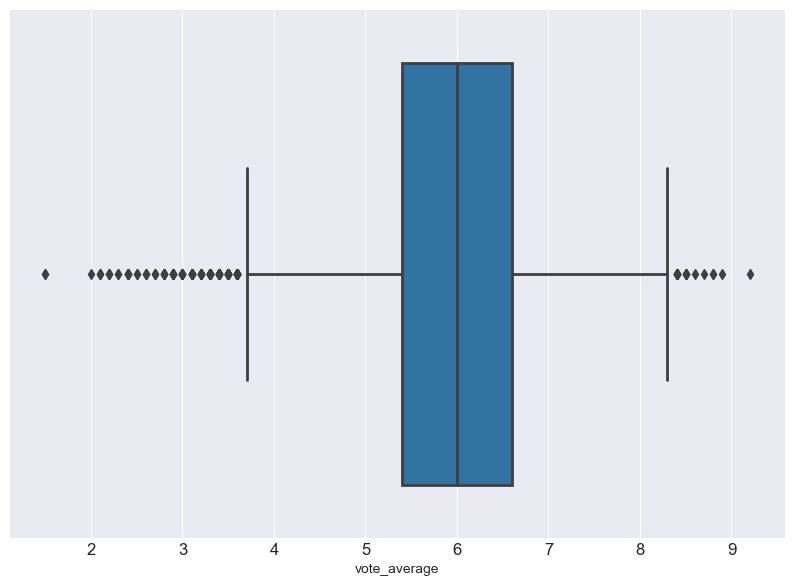

In [24]:
#I will use two plots, the first is a box-plot
#giving figure size
plt.figure(figsize=(10,7), dpi = 100)

#using seaborn to plot
#plotting box plot
sns.boxplot(tmdb_df['vote_average'], linewidth = 2)
#showing the plot
plt.show()

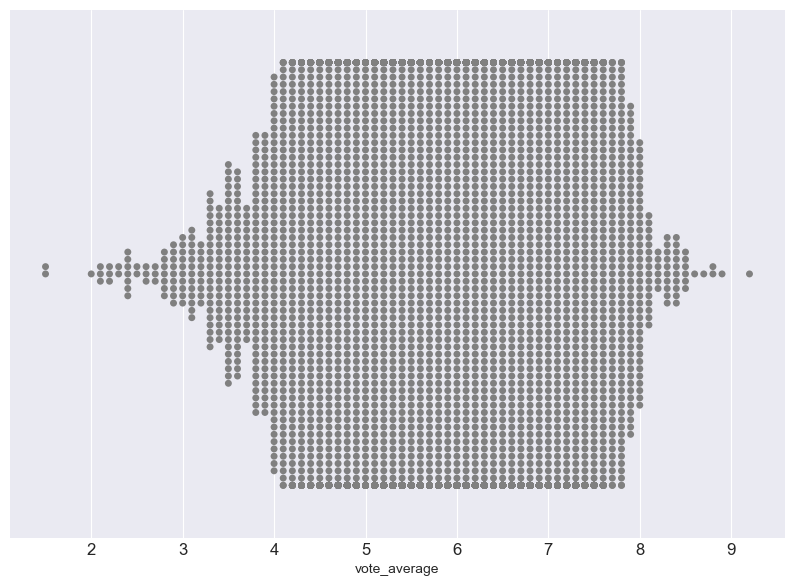

In [25]:
#plots the data points of vote_average of movies

#giving figure size
plt.figure(figsize=(10,7), dpi = 100)

sns.swarmplot(tmdb_df['vote_average'], color = 'grey')
plt.show()

In [26]:
tmdb_df['vote_average'].describe()

count    10865.000000
mean         5.975012
std          0.935138
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

both graphes above shows the total distribution of average votes of movies by plotting the points where they lie in the ditribution and how many movies percent of movies lie below the average votes.

the good thing about box-plot is that it is a good way to summrize large amount of data, from the box-plot graph we see how many outliers we have, the min and max points, the median and IQR.

both visualiztions and calculations shows the following,

- There are 25% having average votes of less than *5.4*
- There are 50% having average votes of less than *6.0*. This is also the median of runtimes.
- There are 75% having average votes of less than *6.6*
- 50% having average votes of between *5.4* and *6.6*. This is also our IQR.


As we can see there are more movies after the 3rd quartile range than the 1st. This makes the mean of the runtime pull towards the right or increases it.




In [27]:
tmdb_df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
popularity,1.000000,0.399198,0.503004,0.136838,0.800828,0.209517,0.089806,0.464834
budget,0.399198,1.000000,0.578158,0.120417,0.473731,0.056310,-0.015360,0.397608
revenue,0.503004,0.578158,1.000000,0.067182,0.601094,0.129194,-0.073746,0.978536
runtime,0.136838,0.120417,0.067182,1.000000,0.162575,0.154539,-0.112149,0.045137
vote_count,0.800828,0.473731,0.601094,0.162575,1.000000,0.253818,0.107962,0.556317
vote_average,0.209517,0.056310,0.129194,0.154539,0.253818,1.000000,-0.117576,0.131064
release_year,0.089806,-0.015360,-0.073746,-0.112149,0.107962,-0.117576,1.000000,-0.079053
profit,0.464834,0.397608,0.978536,0.045137,0.556317,0.131064,-0.079053,1.000000


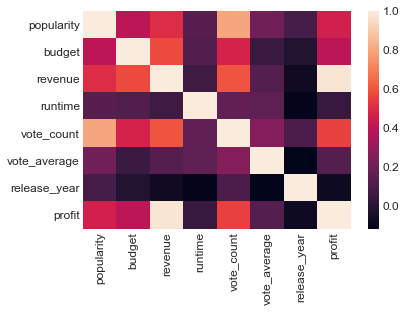

In [28]:
#checking the correlation between the variables 

corr = tmdb_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

based on the correlation matrix, we see there is correlation between some variables. eg,

- vote_count and popularity (80%)
- vote_count and revenue (60%)
- revenue and profit (98%)

we will explore each by a scatter plot


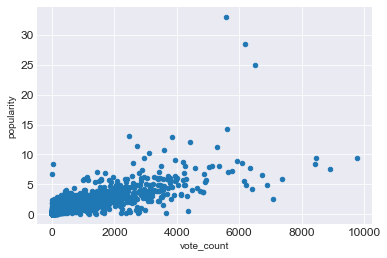

In [29]:
tmdb_df.plot(x='vote_count', y='popularity', kind='scatter');


we expect such correlation, since as populare a movie is as more vote count will get

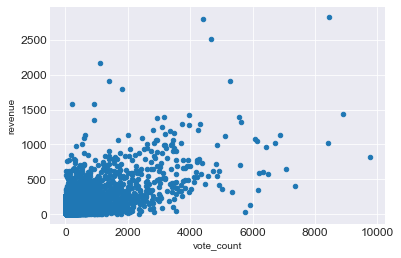

In [30]:
tmdb_df.plot(x='vote_count', y='revenue', kind='scatter');


this is intersting, since it doesn't have to be that the more count a movie gets the more revenue the movie receive 

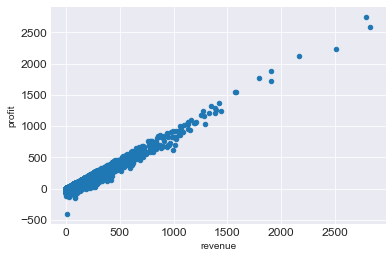

In [31]:
tmdb_df.plot(x='revenue', y='profit', kind='scatter');


we expect such correlation, since *profit* is a function of the budget and *revenue*

In [32]:
# This is to create a function for getting the lowest and highest value
def lowest_highest(col):
    
    lowest = tmdb_df[col].idxmin()
    lowest_data = pd.DataFrame(tmdb_df.loc[lowest])  
    
    highest = tmdb_df[col].idxmax()
    highest_data = pd.DataFrame(tmdb_df.loc[highest])
    
    combine = pd.concat([lowest_data,highest_data], axis=1)
    
    return combine

# checking the function
lowest_highest('profit')

,2244,1329
popularity,0.25054,12.0379
budget,425,39.5756
revenue,11.0876,2789.71
original_title,The Warrior's Way,Star Wars
director,Sngmoo Lee,George Lucas
keywords,assassin|small town|revenge|deception|super speed,android|galaxy|hermit|death star|lightsaber
runtime,100,121
production_companies,Boram Entertainment Inc.,Lucasfilm|Twentieth Century Fox Film Corporation
release_date,2010-12-02 00:00:00,1977-03-20 00:00:00
vote_count,74,4428


the first row (column names) above is the index number from the dataset. the first column shows the lowest profit (in this case it is a loss) and the info for that spesefic row. the second column is the same as the first but it is the highest profit.

as we see from the above table, the dircetor *Sngmoo Lee* have the lowest profit in the movie *The Warrior's Way* released in 2010 with a loss of 414 millions. where the dircetor *George Lucas* have the highest profit in the movie *Star Wars* released in 1977 with a proft of 2.75 billions. 



In [33]:
lowest_highest('runtime')

,4883,3894
popularity,0.078472,0.006925
budget,65.1594,3.80862
revenue,257.633,10.5552
original_title,Fresh Guacamole,The Story of Film: An Odyssey
director,PES,Mark Cousins
keywords,NaN,cinema|nouvelle vague|hindi cinema|cinema novo...
runtime,2,900
production_companies,NaN,NaN
release_date,2012-03-02 00:00:00,2011-09-03 00:00:00
vote_count,29,14


as we see from the above table, the dircetor *PES* have the shortest runtime with 2 minutes only in the movie *Fresh Guacamole* released in 2012 had a profit of 192 millions which is a very high profit for a very short moive and it is an animation movie. 

where the dircetor *Mark Cousins* have the longest runtime with 15 Hours! I looked up for the title and it is a series with 15 episodes. the name of the series *The Story of Film: An Odyssey* released in 2011 had a profit of 6.7 millions and it is a Documentary series. 


## Conclusion

- The average votes is 6 and the distribution for the average votes is left-skewed.
- vote_count and popularity are highly correlated with 80%
- vote_count and revenue are slightly correlated with 60%
- revenue and profit are almost perfect correlated with 98%
- highest profit is the movie *Star Wars* released in 1977 with a profit of 2.75 billions.
- the shorttest runtime movie is 2 minutes with a profit of 192 millions. that indicates you can have high profitable movie with short runtime but you have to be creative. 

